In [8]:
import numpy as np
import random

In [24]:
X = [[0.4, 0.2, -0.3],
    [0.1, 0.77, 0.13],
    [-0.1, 0.5, -0.87],
    [0.67, 0.32, -5.4]]

In [25]:
class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def ForwardPass(self, inputs):
        self.output = np.dot(inputs,self.weights) + self.biases

In [26]:
class ActivationReLU:
    def forward(self, inputs):
        self.output = max(0, inputs)

In [27]:
layer1 = DenseLayer(3,5)
layer2 = DenseLayer(5,2)

layer1.ForwardPass(X)
layer2.ForwardPass(layer1.output)
print(layer2.output)

[[ -1.25501319   0.38952978]
 [ -1.24469501   0.53341256]
 [ -2.47457506   2.44860301]
 [-11.3095169   10.47297887]]


In [33]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [40]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

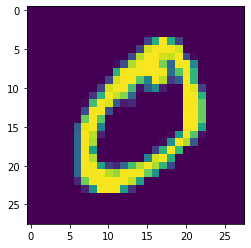

In [41]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])
plt.show()

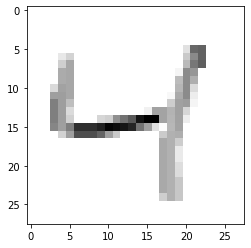

In [44]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[2], cmap = plt.cm.binary)
plt.show()

In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer = 'Adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2650 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723 - accuracy: 0.9779


In [50]:
val_loss,val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9736


In [51]:
model.save('mnist_num_reader')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: mnist_num_reader\assets


In [52]:
new_model = tf.keras.models.load_model('mnist_num_reader')

In [53]:
predictions = new_model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x0000029026F2A190>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x0000029026F2A190>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [54]:
predictions

array([[6.6271866e-08, 1.8785454e-07, 3.7776765e-05, ..., 9.9994147e-01,
        5.9170651e-07, 1.4090880e-06],
       [1.7370900e-09, 3.4969172e-04, 9.9964941e-01, ..., 1.7446040e-09,
        1.2275877e-09, 3.6822845e-12],
       [8.3121716e-07, 9.9891162e-01, 2.9328452e-05, ..., 3.9543450e-04,
        4.3270263e-04, 2.0345005e-05],
       ...,
       [4.1949360e-09, 9.7537274e-08, 4.3521723e-08, ..., 7.2736751e-05,
        2.5291877e-06, 1.5033824e-04],
       [2.1185328e-06, 7.8597895e-06, 8.4392738e-08, ..., 1.9446813e-06,
        3.4877561e-05, 7.8360598e-09],
       [1.2991178e-07, 2.4086308e-08, 9.4404562e-08, ..., 5.5583675e-09,
        4.1334891e-09, 4.3332782e-10]], dtype=float32)

In [56]:
import numpy as np 

print(np.argmax(predictions[1]))

2


In [58]:
y_test[1]

2

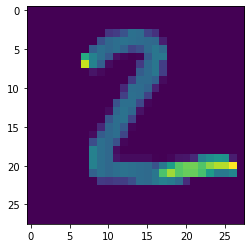

In [61]:
plt.imshow(x_test[1])
plt.show()

In [70]:
!pip3 install opencv-python

In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [108]:
DIRECTORY = r"C:\Users\hp\Desktop\Winter_22\KMDK\Python\kagglecatsanddogs_3367a\PetImages"
CATEGORIES = ["Cat", "Dog"]
IMG_SIZE = 50

C:\Users\hp\Desktop\Winter_22\KMDK\Python\kagglecatsanddogs_3367a\PetImages\Cat


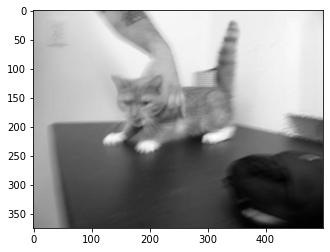

In [110]:
for c in CATEGORIES:
    path = os.path.join(DIRECTORY, c)
    #path = path.replace('\\','/')
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [126]:
training_data =[]
def create_training_data():
    for c in CATEGORIES:
        path = os.path.join(DIRECTORY, c)
        #print(path)
        class_num  = CATEGORIES.index(c)
        for img in os.listdir(path):
            #print(img)
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                #print(new_array)
                training_data.append([new_array, class_num])
                #print(training_data)
            except Exception as e:
                pass
create_training_data()

In [128]:
print(len(training_data))

24946


In [131]:
import random

random.shuffle(training_data)

In [137]:
for sample in training_data[:5]:
    print(sample[1])

0
1
0
1
1


In [164]:
X= []
y=[]

In [165]:
for features, labels in training_data:
    #print(features, labels)
    X.append(features)
    y.append(labels)

In [166]:
X[0]

array([[ 49,  44,  47, ..., 114, 119, 118],
       [ 30,  29,  29, ..., 124, 133, 128],
       [ 28,  30,  32, ..., 138, 145, 141],
       ...,
       [ 46,  49,  52, ...,  48,  45,  43],
       [ 52,  57,  54, ...,  47,  52,  45],
       [ 57,  49,  53, ...,  53,  50,  49]], dtype=uint8)

In [167]:
X= np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)
X[0]

array([[[ 49],
        [ 44],
        [ 47],
        ...,
        [114],
        [119],
        [118]],

       [[ 30],
        [ 29],
        [ 29],
        ...,
        [124],
        [133],
        [128]],

       [[ 28],
        [ 30],
        [ 32],
        ...,
        [138],
        [145],
        [141]],

       ...,

       [[ 46],
        [ 49],
        [ 52],
        ...,
        [ 48],
        [ 45],
        [ 43]],

       [[ 52],
        [ 57],
        [ 54],
        ...,
        [ 47],
        [ 52],
        [ 45]],

       [[ 57],
        [ 49],
        [ 53],
        ...,
        [ 53],
        [ 50],
        [ 49]]], dtype=uint8)

In [168]:
import pickle

In [169]:
pickle_out = open('X.pickle',"wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle',"wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [170]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in.close()

In [173]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation,Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time

In [175]:
NAME = "cat_vs_dogs_{}".format(int(time.time()))

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
print(len(X))
X =X /255.0
y = np.array(y)

model = Sequential()
model.add(Conv2D(64, (3,3) ,input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(optimizer = "Adam",
             loss = "binary_crossentropy",
             metrics = ["Accuracy"])

model.fit(X,y, batch_size=32, validation_split =0.1,epochs=3)

24946
Epoch 1/3
702/702 [==============================] - ETA: 0s - loss: 0.6334 - Accuracy: 0.6278WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002904E2F6700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
702/702 [==============================] - 76s 107ms/step - l

In [193]:
CATEGORIES = ["Cat","Dog"]

def prepare(filepath):
    IMG_SIZE = 50
    #print(filepath)
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    #print(type(img_array))
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE, 1)

In [194]:
prediction = model.predict([prepare(r'C:\Users\hp\Desktop\Winter_22\KMDK\Python\kagglecatsanddogs_3367a\PetImages\cat_test.jpg')])
prediction

array([[0.]], dtype=float32)

In [195]:
CATEGORIES[int(prediction[0][0])]

'Cat'

In [196]:
prediction2 = model.predict([prepare(r'C:\Users\hp\Desktop\Winter_22\KMDK\Python\kagglecatsanddogs_3367a\PetImages\dog_test.jpg')])
prediction2

array([[1.]], dtype=float32)

In [197]:
CATEGORIES[int(prediction2[0][0])]

'Dog'

In [198]:
model.save('cat_vs_dog.model')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: cat_vs_dog.model\assets


In [200]:
model_loaded = tf.keras.models.load_model('cat_vs_dog.model')
prediction3 = model_loaded.predict([prepare(r'C:\Users\hp\Desktop\Winter_22\KMDK\Python\kagglecatsanddogs_3367a\PetImages\cat_test.jpg')])
CATEGORIES[int(prediction3[0][0])]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x000002904E2C6E50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x000002904E2C6E50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


'Cat'